# Stock Price Prediction

Stock price prediction using Support Vector Machine (SVM).

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import yfinance as yf

In [8]:
# GOLD
stocks = "GC=F"
data = yf.download(stocks, start="2020-01-01", end="2021-01-01", auto_adjust=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,1518.099976,1528.699951,1518.000000,1524.500000,214
2020-01-03,1530.099976,1552.699951,1530.099976,1549.199951,107
2020-01-06,1580.000000,1580.000000,1560.400024,1566.199951,416
2020-01-07,1558.300049,1576.300049,1558.300049,1571.800049,47
2020-01-08,1579.699951,1604.199951,1552.300049,1557.400024,236


In [10]:
data.shape

(253, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [12]:
data.describe()

,Open,High,Low,Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,1772.831622,1785.101188,1760.835968,1773.164030,4885.241107
std,139.327096,138.752480,139.961262,139.687898,26978.273288
min,1469.300049,1484.000000,1452.099976,1477.300049,3.000000
25%,1669.699951,1686.199951,1650.000000,1666.400024,117.000000
50%,1779.800049,1790.099976,1770.699951,1781.900024,294.000000
75%,1893.000000,1901.300049,1882.500000,1893.099976,730.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,251274.000000


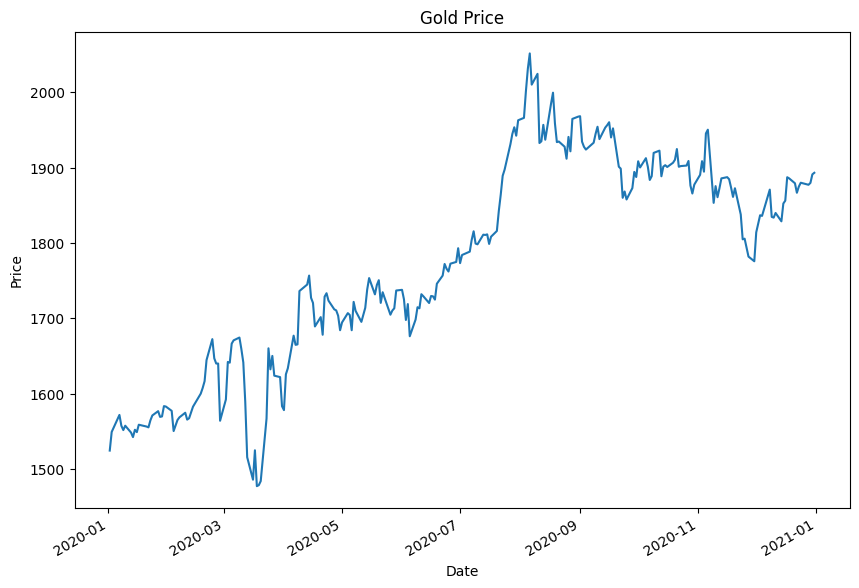

In [16]:
data.Close.plot(figsize=(10, 7))
plt.title("Gold Price")
plt.ylabel("Price")
plt.show()

Stock prices are non-linear and hence, not much suited for SVMs in the real life scenario. 

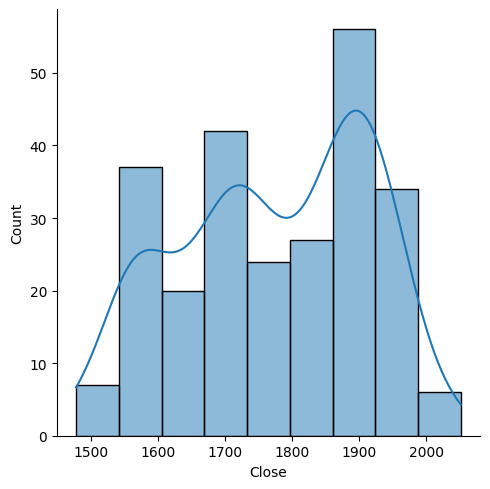

In [17]:
sns.displot(data.Close, kde=True)

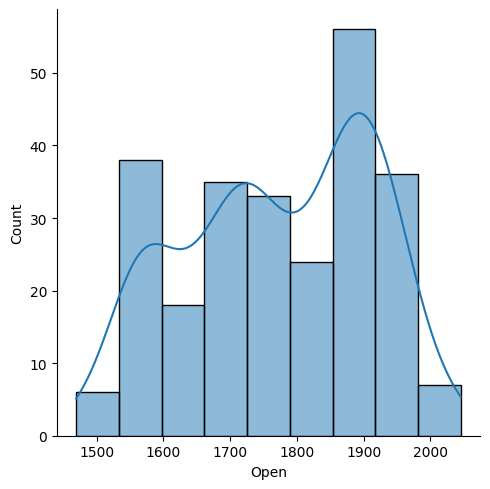

In [18]:
sns.displot(data.Open, kde=True)

We have understood
- The shape of the data
- How the data is distributed

In [23]:
# Target variable is the direction of our stock
X = data.drop("Close", axis=1)
y = data["Close"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
print(X_train.shape) # Features to train
print(X_test.shape) # Features to test
print(y_train.shape) # Labels to train
print(y_test.shape) # Labels to test

(202, 4)
(51, 4)
(202,)
(51,)


## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

pred1, y_test # Predicted values and actual values are very close

(array([1978.69293484, 1685.17679247, 1927.50171644, 1721.03405893,
        2056.04483533, 1898.93607405, 1761.84045664, 1804.34307299,
        1619.0428119 , 1797.53914568, 2034.8531549 , 1824.06179128,
        1713.90442586, 1888.03898367, 1922.58019589, 1697.15573038,
        1908.48412947, 1929.63509709, 1978.84551677, 1724.89042512,
        1889.03156031, 1667.92136685, 1837.35988192, 1839.16169627,
        1732.79636512, 1897.88053956, 1536.980157  , 1541.29231824,
        1925.16425548, 1641.35620465, 1875.29840999, 1778.65566146,
        1728.61335482, 1901.76604423, 1982.45233382, 1937.13299238,
        1873.98710535, 1545.47721153, 1552.32873981, 1910.18013245,
        1773.9512059 , 1558.08555094, 1902.91796864, 1958.73574876,
        1711.01247288, 1815.46638229, 1842.32052651, 1663.22785957,
        1630.16953729, 1892.99782701, 1730.14803331]),
 Date
 2020-08-18    1999.400024
 2020-05-01    1694.500000
 2020-09-03    1927.599976
 2020-05-28    1713.300049
 2020-08-06    

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    """
    y_test: ground truth
    y_pred: model predicted values
    """
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R2 Score: {r2_sc}")
    
calculate_metrics(y_test, pred1)

Mean Squared Error: 56.62480764332685
Root Mean Squared Error: 7.524945690390519
R2 Score: 0.9968789662176264


## Regularized Linear Regression Models

In [36]:
from sklearn.linear_model import Lasso, Ridge

In [39]:
la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

calculate_metrics(y_test, la_p)
calculate_metrics(y_test, ri_p) # Less prone to overfitting

Mean Squared Error: 56.11479941299198
Root Mean Squared Error: 7.490981204955195
R2 Score: 0.9969070767398942
Mean Squared Error: 56.62367741808081
Root Mean Squared Error: 7.52487059145078
R2 Score: 0.9968790285131347
